## EDA

**Karina Huang, Lipika Ramaswamy**

**Apr 28, 2019**

---

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

### Datasets

ProPublica included 3 datasets on their Github page. Because there is no clear documentation regarding how the data was cleaned (we found discrepancies in the their reported methods and the actual dataset), we examined each of the dataset below. 

In [2]:
#load data
rawData = pd.read_csv('data/compas-scores-raw.csv')
twoYear = pd.read_csv('data/compas-scores-two-years.csv')
twoYearV = pd.read_csv('data/compas-scores-two-years-violent.csv')

#### I. Raw Data

The raw data provided included information for 18,610 unique individuals. A snapshot of the dataset is presented below. ProPublica claimed to have only used scores acquired at the pretrial stage. We are unable to replicate the number of individuals, 11,757 by ProPublica's description, after removing those not assessed at the pretrial stage. Note that the current dataset appears to have included decile scores of -1, which is not within the range of decile score provided by COMPAS. 

In [3]:
#check data frame
rawData.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [14]:
#size of data
rawData.shape

(60843, 28)

In [4]:
#check missing values
rawData.isna().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

In [5]:
#compas score types
rawData.DisplayText.value_counts()

Risk of Failure to Appear    20281
Risk of Recidivism           20281
Risk of Violence             20281
Name: DisplayText, dtype: int64

In [6]:
#ethnicity
rawData.Ethnic_Code_Text.value_counts()

African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64

In [7]:
#recode ethnicity column
rawData.Ethnic_Code_Text = rawData.Ethnic_Code_Text.apply(lambda x: 'African-American' if x == 'African-Am' else x)

In [8]:
#sex
rawData.Sex_Code_Text.value_counts()

Male      47514
Female    13329
Name: Sex_Code_Text, dtype: int64

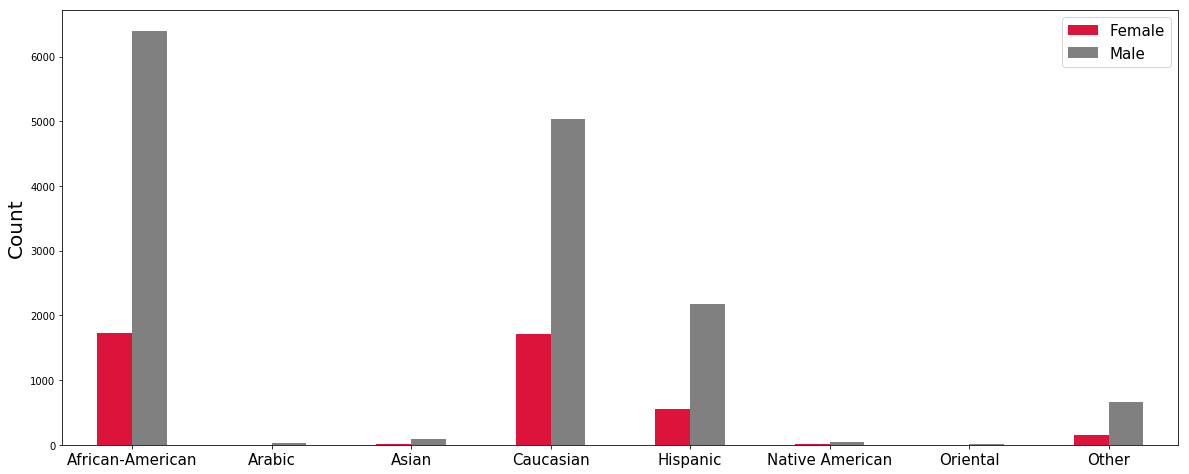

In [9]:
#get unique individuals in dataset
ind = rawData.drop_duplicates(subset = ['Person_ID']) 

#group by ethnicity and sex
demog = ind.groupby(['Ethnic_Code_Text', 'Sex_Code_Text']).agg({
    'Person_ID': len
}).unstack()

#visualize demographics
fig, ax = plt.subplots(figsize = (20, 8))
demog.plot(ax = ax, kind = 'bar', color = ['crimson', 'gray'])
ax.set_xticklabels(labels = demog.index, rotation = 360, fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('Count', fontsize = 20)
ax.legend(['Female', 'Male'], fontsize = 15)
plt.show()

In [15]:
#number of individuals in the data
print('Number of unique individuals in dataset: ', len(ind))

Number of unique individuals in dataset:  18610


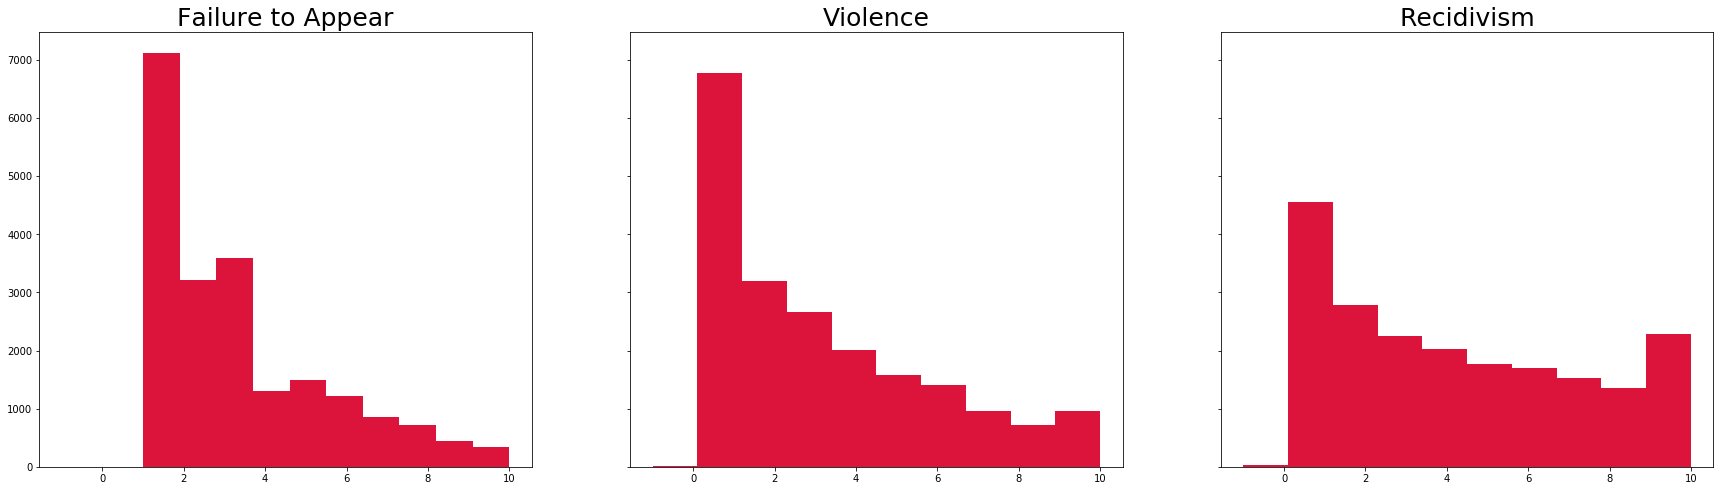

In [10]:
#subset data by score type
fta = rawData[rawData.DisplayText == 'Risk of Failure to Appear']
violence = rawData[rawData.DisplayText == 'Risk of Violence']
recidivism = rawData[rawData.DisplayText == 'Risk of Recidivism']

#visualize distribution of decile score
dfs = [fta, violence, recidivism]
labels = ['Failure to Appear', 'Violence', 'Recidivism']
fig, axes = plt.subplots(1, 3, figsize = (30, 8), sharex = True, sharey = True)
for i, ax in enumerate(axes.flat):
    ax.hist(dfs[i]['DecileScore'], color = 'crimson')
    ax.set_title(labels[i], fontsize = 25)
plt.show()

In [13]:
#check number of scores each person received
byPerson = rawData.groupby(['Person_ID']).agg({'Case_ID': len}).reset_index().rename(columns = {'Case_ID': 'cnt'})
display(byPerson.head())
#check if anyone received less than or more than 3 scores
l3 = byPerson[byPerson.cnt < 3]
m3 = byPerson[byPerson.cnt > 3]
print('Number of individuals with less than 3 scores: ', len(l3))
print('Number of individuals with more than 3 scores: ', len(m3))

,Person_ID,cnt
0,656,3
1,667,3
2,684,3
3,737,3
4,745,3


Number of individuals with less than 3 scores:  0
Number of individuals with more than 3 scores:  1533


In [23]:
#subset scores only for pretrials
pretrial = rawData[rawData.LegalStatus == 'Pretrial'] 
pretrial.shape

(37578, 28)

In [24]:
#number of unique individual assessed at pretrial stage
pInd = pretrial.groupby(['Person_ID']).agg({'Case_ID': len}).reset_index().rename(columns = {'Case_ID': 'cnt'})
#check if individual received less than or more than 3 scores
l3 = pInd[pInd.cnt < 3]
m3 = pInd[pInd.cnt > 3]
print('Number of unique individuals in pretrial set: ', len(pInd))
print('Number of individuals with less than 3 scores: ', len(l3))
print('Number of individuals with more than 3 scores: ', len(m3))

Number of unique individuals in pretrial set:  11779
Number of individuals with less than 3 scores:  0
Number of individuals with more than 3 scores:  683


---

#### II. Two Year

In [25]:
#check data frame
twoYear.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [28]:
twoYear.shape

(7214, 53)

In [30]:
twoYear.isna().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

---

#### III. Two Year Violent

In [26]:
#check data frame
twoYearV.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,0,1,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,13022355MM10A,2013-11-30,NaN,0.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [29]:
twoYearV.shape

(4743, 54)